# MENACE (Matchbox Educable Noughts and Crosses Engine)

In [1]:
from random import choice
import matplotlib.pyplot as plt

In [2]:
def winning(state,p):
    for x in [[0,1,2],[3,4,5],[6,7,8],[0,3,6],[1,4,7],[2,3,8],[0,4,8],[2,4,6]]:
        if state[x[0]] == p and state[x[1]] == p and state[x[2]] == p:
            return True
    return False

In [3]:
class matchbox():
    def __init__(self,state):
        self.beads = [i for i in range(9) if state[i]==0]
        self.selected = None
    def pick_bead(self):
        if len(self.beads) == 0:
            return None
        self.selected = choice(self.beads)
        return self.selected
    def reward(self):
        pass
        #self.beads.append(self.selected)
    def try_punish(self):
        if len(self.beads) == 0:
            return False
        self.beads.remove(self.selected)
        return True
    def pr(self):
        print(self.beads, self.selected)

In [4]:
I_RESIGN = 0
I_WIN = 1
I_LOSE = 2
PLAYING = 3

class MENACE:
    def __init__(self, name):
        self.name = name
        self.matchboxes = {}
        self.restart()
    def restart(self):
        self.state = [0]*9
        self.history = []
    def play(self,i):
        if i!=None:
            self.state[i] = 1
            if winning(self.state,1):
                return I_LOSE, None
        t = tuple(self.state)
        if t not in self.matchboxes:
            self.matchboxes[t] = matchbox(t)
        box = self.matchboxes[t]
        response = box.pick_bead()
        if response == None:
            return I_RESIGN, None
        self.history.append(box)
        self.state[response] = 2
        if winning(self.state,2):
            return I_WIN, response
        return PLAYING, response
    def reward(self):
        for box in self.history:
            box.reward()
    def punish(self):
        while len(self.history)>0 and not self.history.pop().try_punish():
            pass

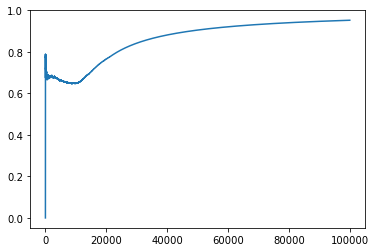

In [5]:
N_MATCHES = 100000
ratios = [0]*N_MATCHES
nwins = 0

first = MENACE("1")
second = MENACE("2")


for i in range(N_MATCHES):
    first.restart()
    second.restart()
    current,other = first,second
    playing = True
    phase, move = current.play(None)
    #print(current.name,"plays",move)
    while phase == PLAYING:
        current, other = other, current
        phase, move = current.play(move)
        #print(other.name,"plays",move)
        if phase == I_LOSE or phase == I_RESIGN:
            current.punish()
            other.reward()
            if other == first:
                nwins+=1
        elif phase == I_WIN:
            current.reward()
            other.punish()
            if current == first:
                nwins+=1
    ratios[i] = nwins/(i+1)
    first,second = second,first
    
plt.plot(ratios)